In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
data_df = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

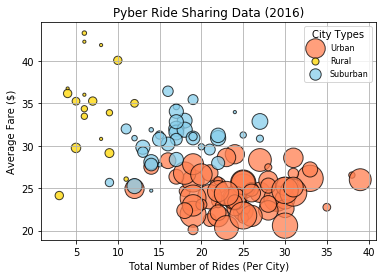

In [20]:
# Obtain the x and y coordinates for each of the three city types
urban_city = data_df[data_df["type"] == "Urban"].groupby([data_df["city"]])
rural_city = data_df[data_df["type"] == "Rural"].groupby([data_df["city"]])
suburban_city = data_df[data_df["type"] == "Suburban"].groupby([data_df["city"]])

x_urban = urban_city["ride_id"].count()
y_urban = urban_city["fare"].mean()
avg_urban = urban_city["driver_count"].mean()

x_rural = rural_city["ride_id"].count()
y_rural = rural_city["fare"].mean()
avg_rural = rural_city["driver_count"].mean()

x_suburban = suburban_city["ride_id"].count()
y_suburban = suburban_city["fare"].mean()
avg_suburban = suburban_city["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=avg_urban * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=avg_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=avg_suburban  * 10, color=["skyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Save Figure
plt.savefig("PyberRideSharingData.png", bbox_inches="tight")

In [6]:
# Show plot
plt.show()

## Total Fares by City Type

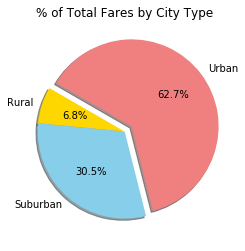

In [21]:
# Calculate Type Percents
type_group = data_df.groupby(['type'])
fare_sum = type_group['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("TotalFaresbyCityType.png")


In [11]:
# Show Figure
plt.show()

## Total Rides by City Type

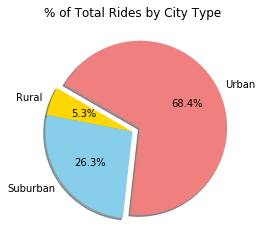

In [22]:
# Calculate Ride Percents
rides_count = type_group['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("TotalRidesbyCityType.png")




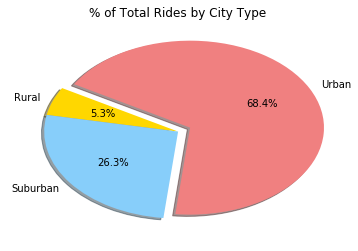

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

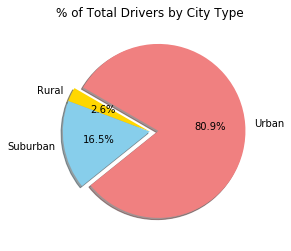

In [23]:
# Calculate Driver Percents
drivers_group = city_data.groupby(['type'])
drivers_sum = drivers_group['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "lightcoral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("TotalDriversbyCityType.png")



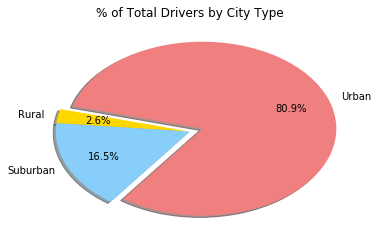

In [6]:
# Show Figure
plt.show()